In [1]:
import tensorflow as tf
import numpy as np
import time 
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [8]:
train, test = fashion_mnist.load_data()

X_train_raw, y_train = train
X_test_raw, y_test = test

label_map = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

print('Raw traning data shape: ', X_train_raw.shape)
print('Raw test data shape: ', X_test_raw.shape)

X_train = X_train_raw.reshape((X_train_raw.shape[0], X_train_raw.shape[1]**2))
X_test = X_test_raw.reshape((X_test_raw.shape[0], X_test_raw.shape[1]**2))

print('Vectorized training data shape: ', X_train.shape)
print('Vectorized test data shape: ', X_test.shape)

print('Training labels shape: ', y_train.shape)
print('Test labels shape: ', y_test.shape)

Raw traning data shape:  (60000, 28, 28)
Raw test data shape:  (10000, 28, 28)
Vectorized training data shape:  (60000, 784)
Vectorized test data shape:  (10000, 784)
Training labels shape:  (60000,)
Test labels shape:  (10000,)


['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
(60000, 28, 28)


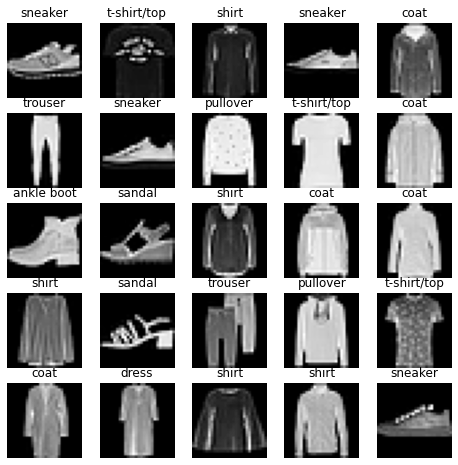

In [11]:
# We need to reshape vectorized data into the image format for visualization
X = X_train.reshape(X_train.shape[0], X_train_raw.shape[1], X_train_raw.shape[2])

print(label_map)
print(X.shape)

#Visualizing Fashion-MNIST data. We randomly choose 25 images from the train dataset.
fig, axes1 = plt.subplots(5,5,figsize=(8,8))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_train_raw[i:i+1][0], cmap='gray')
        axes1[j][k].set_title(label_map[y_train[i]])

In [1]:
import numpy as np

[[ 2.76752903 -4.75887318  4.72133328  4.2211482  -5.57930784 -2.43659435
   0.01949701  4.73339211 -3.0799687  -5.12145323]
 [-2.84086365  4.88497491 -4.84644026 -4.33300117  5.72714964  2.5011598
  -0.02001364 -4.85881863  3.16158242  5.25716269]]
(2, 10)


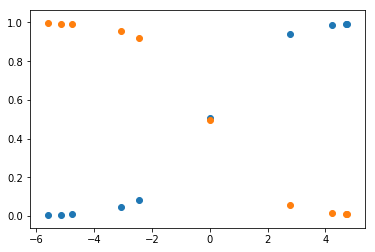

In [27]:
x = 5*(np.random.rand(10,1)-0.5)
w = 5*(np.random.rand(1,2)-0.5)
wx = np.dot(np.transpose(w),np.transpose(x))
# h = 1/(1+np.exp(-wx))
from utils.classifiers.basic_classifiers import *
print(wx)
h = sigmoid(wx)
# print(x[:,0])
print(h.shape)
plt.scatter(wx[0,:],h[0,:])
plt.scatter(wx[0,:],1-h[0,:])


In [28]:
x = np.array([3,4])
print(np.linalg.norm(x,ord=2))

5.0


In [2]:
x = np.random.rand(4,4)
print(np.log(x))

[[-0.35539379 -2.75058602 -2.02940346 -0.6450364 ]
 [-0.35108481 -0.58713852 -1.14388116 -0.35206547]
 [-0.77135005 -0.72886329 -0.97516218 -0.99922937]
 [-0.31614943 -0.06455133 -1.26436322 -2.37254208]]


In [2]:
import tensorflow as tf
import numpy as np
import time 
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
def softmax(f):
      # to make the result numerical stale
      f -= np.max(f,axis=0)
      return np.exp(f)/np.sum(np.exp(f),axis=0)

In [18]:
f = np.random.rand(7,4)
print(softmax(f))
print(f)

[[0.14968153 0.17853169 0.1697345  0.0923038 ]
 [0.13696564 0.12189591 0.1296565  0.21014876]
 [0.20709091 0.12917145 0.10572806 0.13749991]
 [0.11535347 0.2035153  0.09171424 0.23153852]
 [0.08467008 0.16259417 0.22171489 0.09619394]
 [0.21367346 0.10931267 0.16775066 0.11165467]
 [0.09256491 0.09497881 0.11370115 0.12066038]]
[[-0.35593903 -0.13097505 -0.26715684 -0.9196609 ]
 [-0.44471886 -0.51257367 -0.53650361 -0.09693056]
 [-0.03129108 -0.45460057 -0.74052191 -0.52112295]
 [-0.61644792  0.         -0.8827146   0.        ]
 [-0.9256867  -0.22448384  0.         -0.87837988]
 [ 0.         -0.62152884 -0.27891357 -0.72933541]
 [-0.83653884 -0.76208734 -0.66781876 -0.6517664 ]]


In [21]:
choice = np.random.choice(7,4,replace=False)
print(choice)
X_batch = f[choice,:]
print(X_batch)

[4 0 1 3]
[[-0.9256867  -0.22448384  0.         -0.87837988]
 [-0.35593903 -0.13097505 -0.26715684 -0.9196609 ]
 [-0.44471886 -0.51257367 -0.53650361 -0.09693056]
 [-0.61644792  0.         -0.8827146   0.        ]]


In [20]:
import numpy as np

# DEMO for my article: https://medium.com/@lilychencodes/implementing-a-multiclass-classification-machine-learning-algorithm-ea320518ea5d




class SoftmaxRegression:
    def __init__(self, dataset):
        self.dataset = dataset
        self.alpha = 0.001  # alpha is "learning rate"

    def softmax(self, datapoint, thetas, class_idx):
        nominator_theta = thetas[class_idx]
        transformed_datapoint = [1, datapoint[0], datapoint[1]]
        nominator = np.exp(np.dot(nominator_theta, transformed_datapoint))
        denominator = 0
        for theta in thetas:
            denominator += np.exp(np.dot(theta, transformed_datapoint))

        return nominator / denominator

    # find cross entropy of one datapoint
    # datapoint is in format [GPA, exam score, label]
    # thetas = [theta_admitted, theta_waitlisted, theta_rejected]
    def calc_cross_entropy(self, datapoint, thetas):
        cross_ent = 0

        num_class = len(thetas)

        for j in range(0, num_class):
            # compute new theta for class
            label = datapoint[-1]
            class_label = [0] * len(thetas)
            class_label[j] = 1
            label_is_class = label == class_label
            zero_or_one = 1 if label_is_class else 0
            if zero_or_one == 0:
                cross_ent += 0
            else:
                softmax = self.softmax(datapoint, thetas, j)
                cross_ent += np.log(softmax)

        return -1 * cross_ent

    # calculate total cross entropy, which is the average of all cross-entropies over n training samples
    def calc_total_loss(self, thetas):
        total_cross_ent = 0
        for datapoint in self.dataset:
            cross_ent = self.calc_cross_entropy(datapoint, thetas)
            total_cross_ent += cross_ent

        return total_cross_ent

    # get theta for particular class
    def get_theta(self, thetas, class_idx):
        theta_class = thetas[class_idx]
        m = len(self.dataset)

        class_label = [0] * len(thetas)
        class_label[class_idx] = 1

        sum_loss = np.array([0.0] * len(thetas))
        for datapoint in self.dataset:
            softmax_value = self.softmax(datapoint, thetas, class_idx)
            print(softmax_value)

            transformed_datapoint = [1, datapoint[0], datapoint[1]]
            label = datapoint[-1]
            label_is_class = label == class_label
            zero_or_one = 1 if label_is_class else 0
            prod = np.array(transformed_datapoint) * (zero_or_one - softmax_value)
            print(zero_or_one)
            # print(f'datapoint: {datapoint}, class label: {class_label}/{class_idx} softmax val: {softmax_value}')
            sum_loss += prod

        new_gradients = self.alpha * (1/m) * sum_loss

        new_theta = np.sum([new_gradients, theta_class], axis=0)

        return new_theta

    # get new thetas for all classes according to gradient descent formula
    def get_thetas(self, thetas):
        num_class = len(thetas)

        new_thetas = []

        for j in range(0, num_class):
            # compute new theta for class
            theta_class = self.get_theta(thetas, j)
            new_thetas.append(theta_class)

        return new_thetas

    def iterate(self):
        num_iteration = 0
        theta_admitted = [-250, 40, 1]
        theta_waitlisted = [-220, 40, 1]
        theta_rejected = [-220, 40, 1]
        thetas = [theta_admitted, theta_waitlisted, theta_rejected]

        loss = None
        losses = []

        while num_iteration < 1:
            if num_iteration % 500 == 0:
                # print('iteration:', num_iteration)
                # print('loss:', loss)
                # print('thetas:', thetas)
                losses.append({'iteration': num_iteration, 'loss': loss})

            loss = self.calc_total_loss(thetas)
            new_thetas = self.get_thetas(thetas)
            thetas = new_thetas
            num_iteration += 1

        print(f'After {num_iteration}, total loss is {loss}. Theta admitted is {thetas[0]}. Theta waitlisted is {thetas[1]}. Theta rejected is {thetas[2]}.')
        return losses

In [12]:
dataset = [
    [4, 82, [0, 1, 0]],
    [3, 80, [0, 0, 1]],
    [2.5, 75, [0, 0, 1]],
    [3.4, 90, [0, 1, 0]],
    [4.2, 88, [1, 0, 0]],
    [5, 92, [1, 0, 0]],
    [2.7, 99, [0, 0, 1]],
    [3.3, 85, [0, 0, 1]],
    [4.2, 72, [0, 1, 0]],
    [3.6, 80, [0, 1, 0]],
    [2.9, 85, [0, 0, 1]],
    [3.9, 85, [0, 1, 0]],
    [4.5, 99, [1, 0, 0]],
    [4.7, 90, [1, 0, 0]],
    [4.6, 80, [1, 0, 0]],
    [4.6, 75, [0, 1, 0]],
    [3.4, 64, [0, 0, 1]],
    [4, 95, [1, 0, 0]],
    [4.1, 86, [0, 1, 0]],
    [4.5, 90, [1, 0, 0]],
    [3.7, 70, [0, 0, 1]],
    [3.2, 81, [0, 0, 1]]
]

s = SoftmaxRegression(dataset)

s.iterate()


4.6788114844198684e-14
0
4.6788114844198684e-14
0
4.678811484419868e-14
0
4.6788114844198684e-14
0
4.6788114844198684e-14
1
4.6788114844198684e-14
1
4.6788114844198684e-14
0
4.678811484419869e-14
0
4.6788114844198684e-14
0
4.6788114844198684e-14
0
4.678811484419868e-14
0
4.678811484419869e-14
0
4.678811484419868e-14
1
4.678811484419868e-14
1
4.6788114844198684e-14
1
4.678811484419869e-14
0
4.6788114844198684e-14
0
4.678811484419868e-14
1
4.678811484419868e-14
0
4.678811484419869e-14
1
4.678811484419868e-14
0
4.678811484419869e-14
0
0.4999999999999766
1
0.49999999999997663
0
0.4999999999999766
0
0.49999999999997663
1
0.4999999999999766
0
0.49999999999997663
0
0.4999999999999766
0
0.49999999999997663
0
0.4999999999999766
1
0.4999999999999766
1
0.4999999999999766
0
0.4999999999999766
1
0.4999999999999766
0
0.4999999999999766
0
0.4999999999999766
0
0.49999999999997663
1
0.49999999999997663
0
0.4999999999999766
0
0.49999999999997663
1
0.49999999999997663
0
0.49999999999997663
0
0.4999999999

[{'iteration': 0, 'loss': None}]